In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [2]:
# Loading the Mnist dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Train Dataset:", x_train.shape, y_train.shape)

Train Dataset: (60000, 28, 28) (60000,)


In [4]:
print("Test Dataset:", x_test.shape, y_test.shape)

Test Dataset: (10000, 28, 28) (10000,)


In [5]:
num_labels = len(np.unique(y_train))

-------------------- Data Understanding --------------------

In [6]:
# Let's look at a few examples from the dataset.

def visualize_img(data, num_image=None):
  plt.figure(figsize=(10,10))
  for n in range(num_image):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(x_train[n], cmap="gray")
      plt.axis("off")

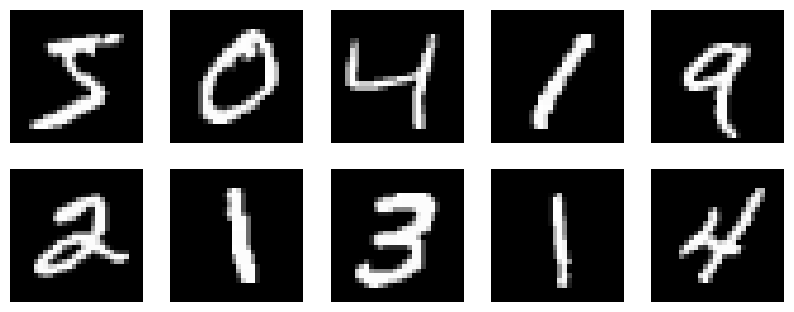

In [7]:
visualize_img(x_train, 10)

In [8]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap= "gray")
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y], 2)), xy = (y,x),
                            color = "white" if img[x][y]<threshold else "black")

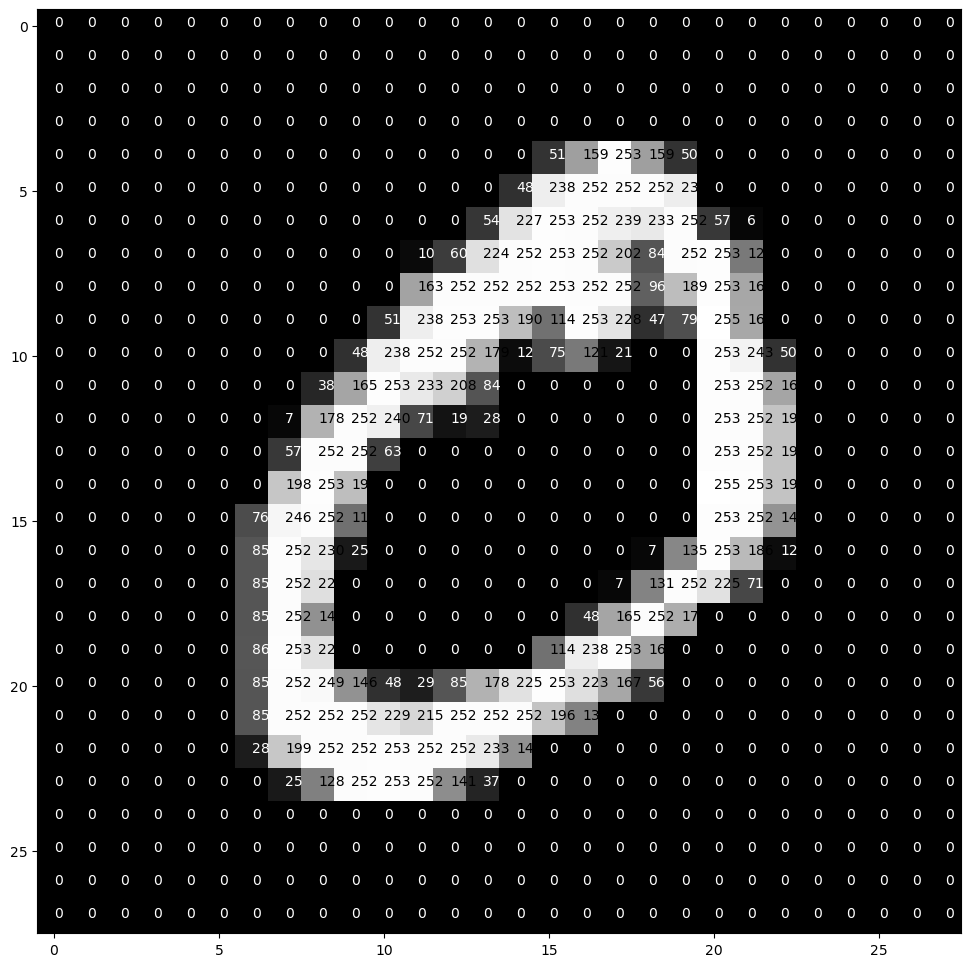

In [9]:
pixel_visualize(x_train[1])

-------------------- Data Preparation --------------------

Encoding

In [10]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Reshaping

In [13]:
image_size = x_train.shape[1]

In [14]:
image_size

28

In [15]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


Normalization

In [17]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Modeling

First, the neural network architecture must be defined.

In [18]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=128, activation="relu", name="layer"),
    Dense(units=num_labels, activation="softmax", name="output_layer")])


model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer (Dense)               (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Let's build the model.

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10


469/469 [==============================] - 2s 2ms/step - loss: 0.3639 - precision: 0.9438 - recall: 0.8486 - accuracy: 0.8993 - val_loss: 0.2028 - val_precision: 0.9583 - val_recall: 0.9310 - val_accuracy: 0.9434
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1718 - precision: 0.9633 - recall: 0.9401 - accuracy: 0.9512 - val_loss: 0.1383 - val_precision: 0.9694 - val_recall: 0.9523 - val_accuracy: 0.9596
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1218 - precision: 0.9727 - recall: 0.9577 - accuracy: 0.9647 - val_loss: 0.1213 - val_precision: 0.9701 - val_recall: 0.9583 - val_accuracy: 0.9634
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0930 - precision: 0.9794 - recall: 0.9685 - accuracy: 0.9739 - val_loss: 0.0981 - val_precision: 0.9756 - val_recall: 0.9675 - val_accuracy: 0.9713
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0760 - precision: 0.9819 -

-------------------- Model Success Evaluation --------------------

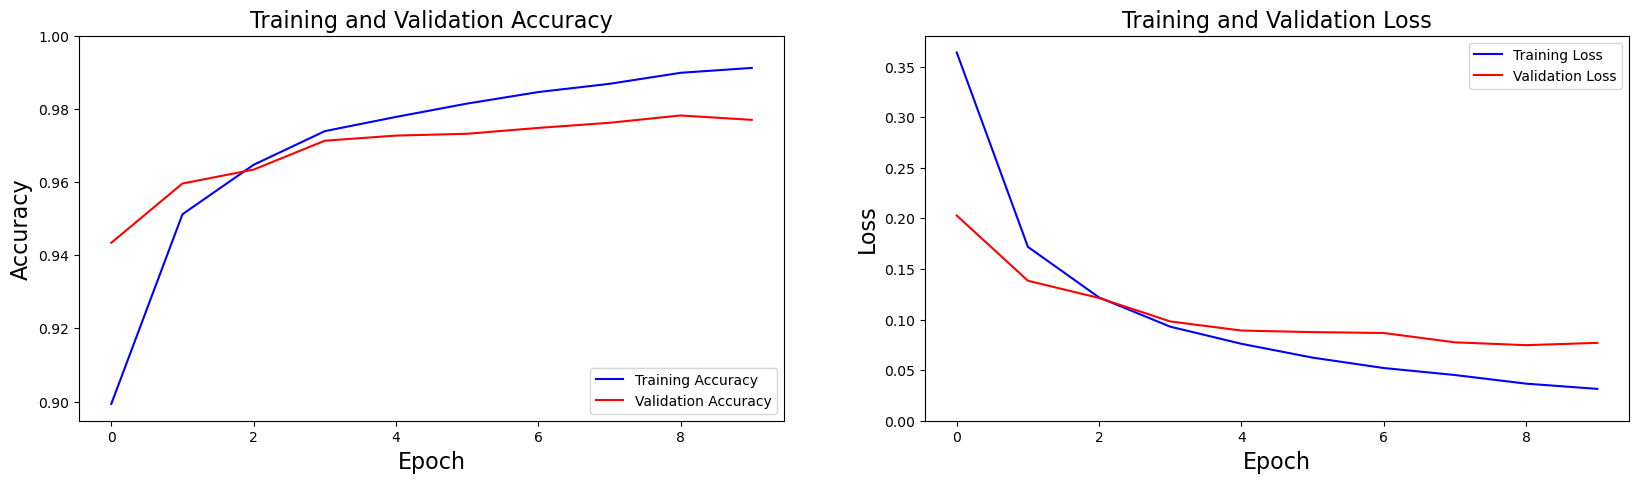

In [21]:
#---------------------
# Accuracy
# ---------------------
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color="b", label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color="r", label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)

#-------------------------
#Loss
# --------------------------
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color="b", label='Training Loss')
plt.plot(history.history['val_loss'], color="r", label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()

In [22]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose= False)

print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.7%

Test Loss: 7.7%

Test Precision: 98.0%

Test Recall: 97.6%


-------------------- Prediction --------------------

In [23]:
# Save the model

model.save("mnist_model.h5")

In [24]:
# Let's choose a random sample from x_test to test the model.

import random

random =random.randint(0, x_test.shape[0])

In [25]:
random

1318

In [26]:
test_image = x_test[random]

In [27]:
y_test[random]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

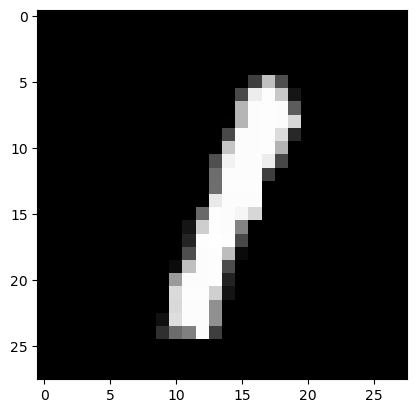

In [28]:
plt.imshow(test_image.reshape(28,28), cmap="gray");

In [29]:
test_data = x_test[random].reshape(1,28,28,1)

In [30]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 65ms/step


In [31]:
 probability

array([[4.4628226e-08, 9.9988806e-01, 5.4266042e-07, 3.5554828e-07,
        1.8348071e-07, 5.3396767e-09, 1.8952923e-10, 8.7636654e-05,
        2.3097453e-05, 1.6619819e-07]], dtype=float32)

In [32]:
predicted_classes = np.argmax(probability)

In [33]:
print(f"Predicted Class: {predicted_classes} \n")
print(f"Probability Value of the Predicted Class: {(np.max(probability, axis=1))[0]} \n")
print(f"Probability Values of Predicted Classes: \n{probability}")

Predicted Class: 1 

Probability Value of the Predicted Class: 0.9998880624771118 

Probability Values of Predicted Classes: 
[[4.4628226e-08 9.9988806e-01 5.4266042e-07 3.5554828e-07 1.8348071e-07
  5.3396767e-09 1.8952923e-10 8.7636654e-05 2.3097453e-05 1.6619819e-07]]
